In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

# 8) `auto` simple regression

In [3]:
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
# regression with horsepower

y = Auto['mpg']
X = MS(['horsepower']).fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [5]:
vals = pd.DataFrame({'horsepower': [98]})
newX = MS(['horsepower']).fit_transform(vals)
predictions = results.get_prediction(newX)
predictions.predicted_mean

array([24.46707715])

In [6]:
predictions.conf_int(alpha=0.05), predictions.conf_int(alpha=0.05, obs=True)

(array([[23.97307896, 24.96107534]]), array([[14.80939607, 34.12475823]]))

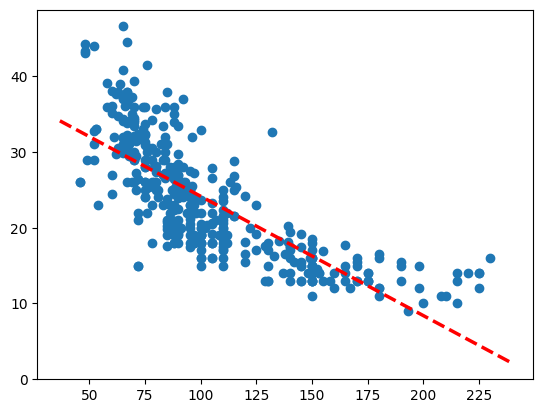

In [7]:
_, ax = plt.subplots()
ax.scatter(X['horsepower'], y)
xlim = ax.get_xlim()
slope =  results.params[1]
ylim = [xlim[0]*slope + results.params[0], xlim[1]*slope+results.params[0]]
ax.plot(xlim, ylim, 'r--', linewidth = 2.5)

# 9) Multiple Linear regression `auto`

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

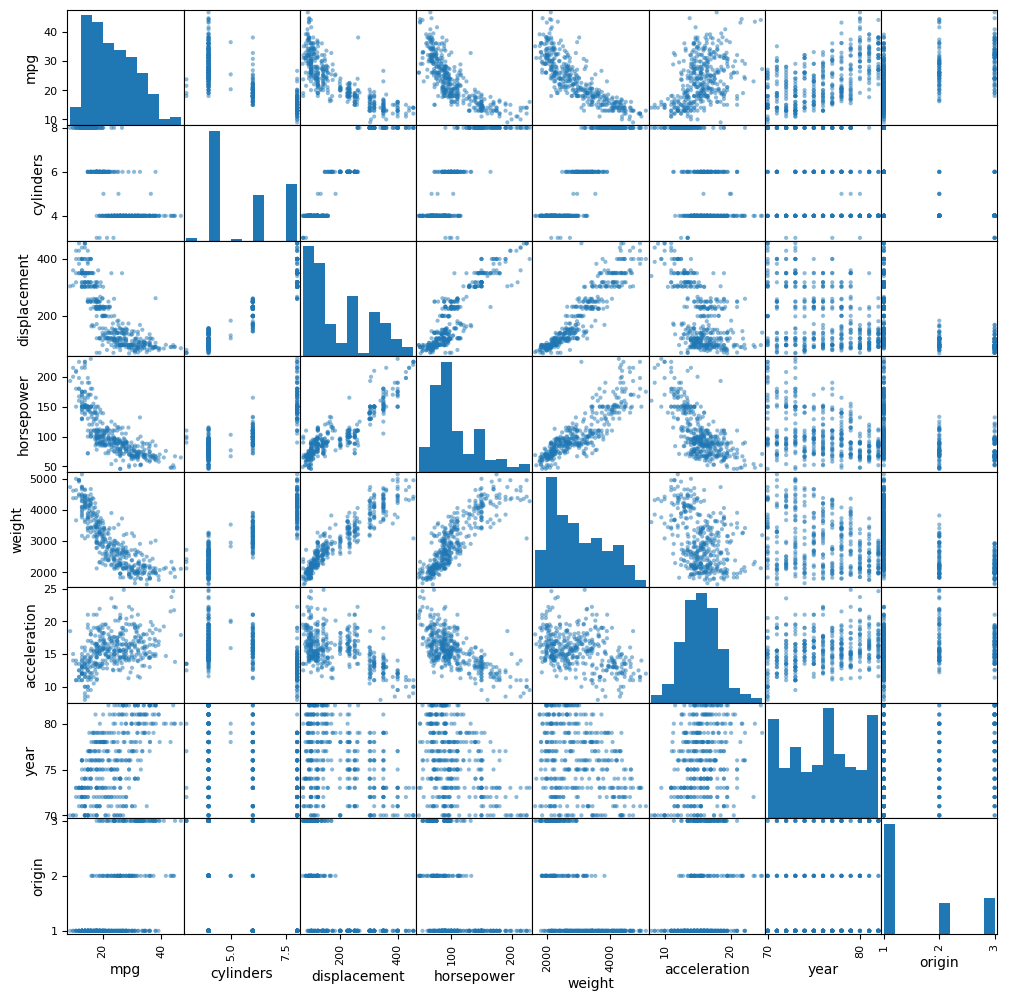

In [8]:
pd.plotting.scatter_matrix(Auto, figsize=(12, 12))

In [9]:
Auto.corr()

C:\Users\jackt\AppData\Local\Temp\ipykernel_27636\340684133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [10]:
columns = Auto.columns.drop(['mpg', 'name'])
X = MS(columns).fit_transform(Auto)
y = Auto['mpg']

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


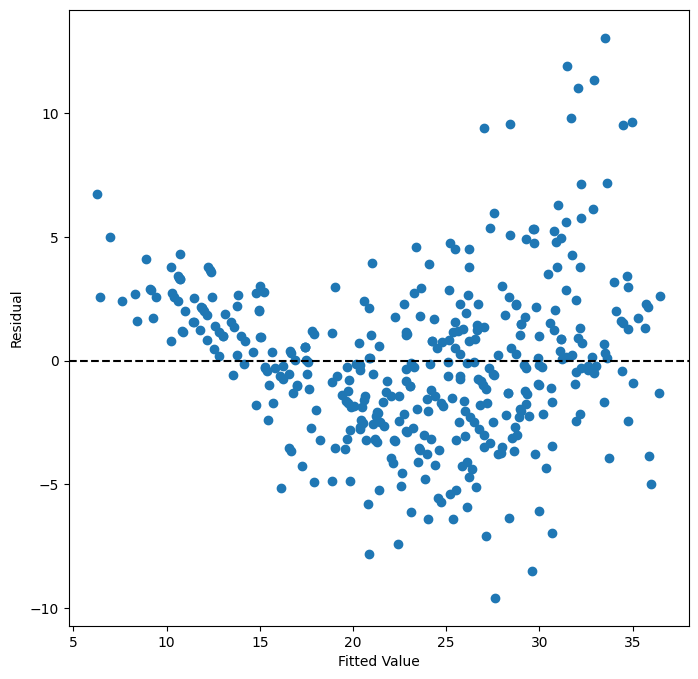

In [11]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

13

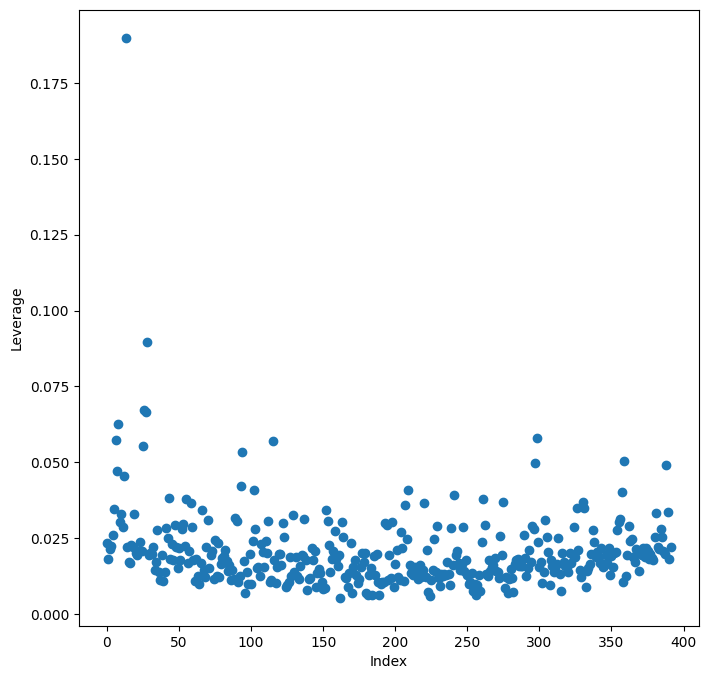

In [12]:
infl = results.get_influence()
_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [13]:

allvars = list(columns) + [('cylinders', 'horsepower'), ('weight', 'horsepower'), ('horsepower', 'weight')]
X = MS(allvars).fit_transform(Auto)

model_int = sm.OLS(y, X)
results_int = model_int.fit()

summarize(results_int)

,coef,std err,t,P>|t|
intercept,9.169800,4.949000,1.853,0.065
cylinders,-2.334700,0.831000,-2.808,0.005
displacement,0.000900,0.007000,0.133,0.894
horsepower,-0.293100,0.031000,-9.338,0.000
weight,-0.007600,0.001000,-5.271,0.000
acceleration,-0.146500,0.090000,-1.632,0.103
year,0.754300,0.045000,16.844,0.000
origin,0.828800,0.249000,3.331,0.001
cylinders:horsepower,0.022000,0.007000,2.952,0.003
weight:horsepower,0.000015,0.000005,2.830,0.005


In [14]:
anova_lm(results, results_int)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,382.0,3217.496451,2.0,1034.716079,61.423773,7.421551e-24


In [15]:
import math

columns = Auto.columns.drop(['mpg', 'name'])
print(columns)
X = MS(list(columns)+[poly('horsepower', degree=2), poly('cylinders', degree=2),  poly('acceleration', degree=2)]).fit_transform(Auto)


model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')


,coef,std err,t,P>|t|
intercept,-10.3096,3.709,-2.779,0.006
cylinders,0.3590,0.299,1.201,0.230
displacement,-0.0090,0.007,-1.217,0.224
horsepower,-0.0787,0.013,-5.916,0.000
weight,-0.0031,0.001,-4.554,0.000
acceleration,-0.4079,0.096,-4.255,0.000
year,0.7355,0.045,16.218,0.000
origin,0.9132,0.253,3.608,0.000
"poly(horsepower, degree=2)[0]",1.4150,0.509,2.779,0.006
"poly(horsepower, degree=2)[1]",31.5607,3.970,7.951,0.000


In [16]:
anova_lm(results, results_int, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,384.0,4252.212530,0.0,NaN,NaN,NaN
1,382.0,3217.496451,2.0,1034.716079,59.152353,4.171536e-23
2,381.0,3332.300453,1.0,-114.804002,-13.126165,1.000000e+00


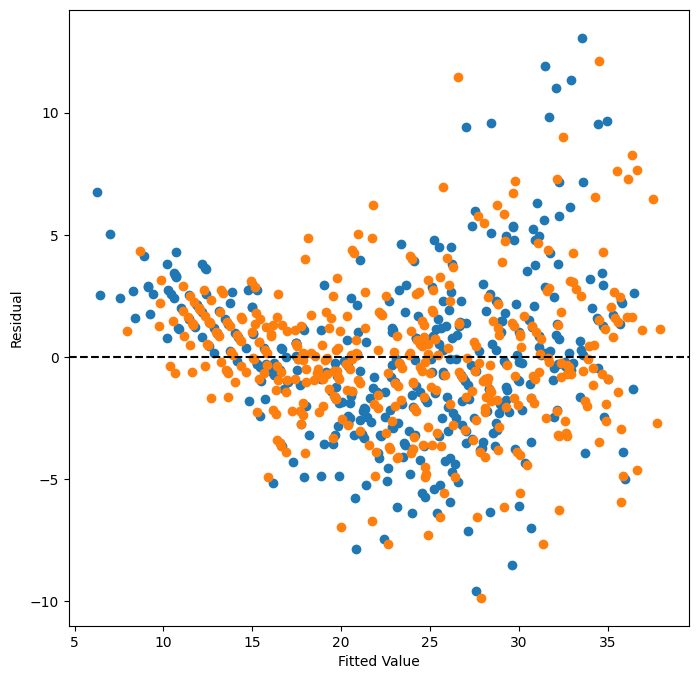

In [17]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
# ax.scatter(results_int.fittedvalues, results_int.resid)
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

# 10) `Carseats`

In [18]:
Carseats = load_data('Carseats')
y = Carseats['Sales']
columns = ['Price', 'Urban', 'US']
X = MS(columns).fit_transform(Carseats)

model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


In [19]:
def lm_fit(df, X, y):
    X = MS(X).fit_transform(df)
    model = sm.OLS(y, X)
    results = model.fit()
    return model, results

In [20]:
model1, results1 = lm_fit(Carseats, columns, y)
summarize(results1)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


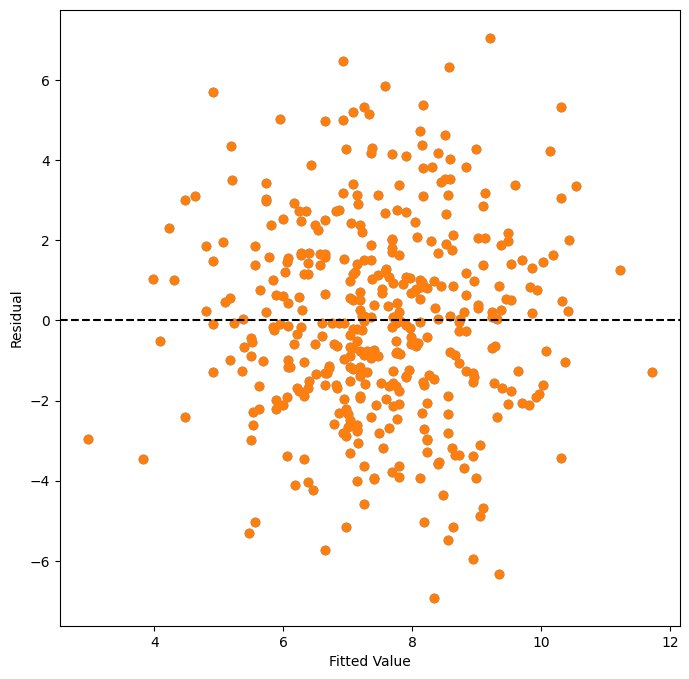

In [21]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.scatter(results1.fittedvalues, results1.resid)

ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [22]:
results1.conf_int(alpha=0.05)

,0,1
intercept,11.763597,14.323341
Price,-0.064764,-0.044154
Urban[Yes],-0.555973,0.512141
US[Yes],0.691304,1.709841


42

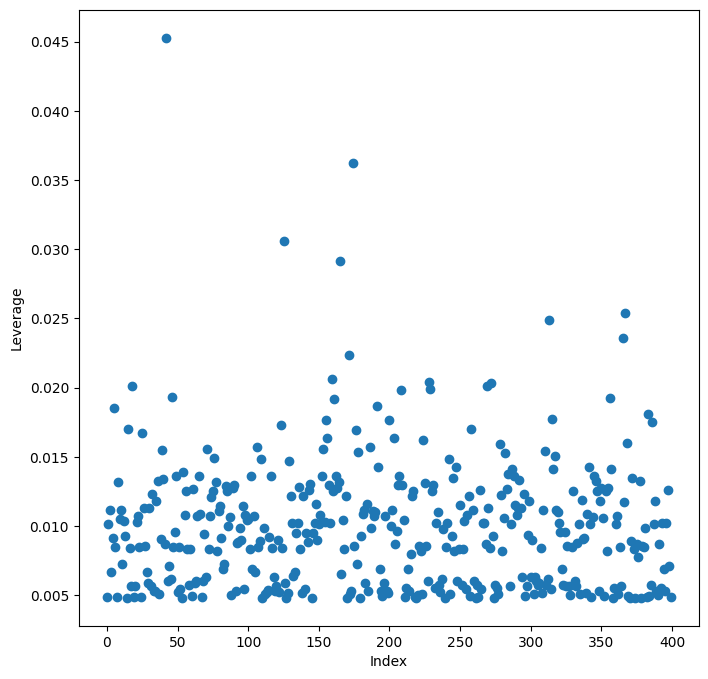

In [23]:
infl = results1.get_influence()
_, ax = plt.subplots(figsize=(8, 8))
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [24]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2*x + rng.normal(size=100)


In [37]:
dataset = pd.DataFrame({'x': x, 'y': y})
X = MS(['x'], intercept=False).fit_transform(dataset)
model = sm.OLS(y, X)
results = model.fit()
summarize(results) 

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


In [36]:
dataset = pd.DataFrame({'x': x, 'y': y})
X = MS(['y'], intercept=False).fit_transform(dataset)
model = sm.OLS(x, X)
results = model.fit()
summarize(results) 

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


In [52]:
x = rng.normal(size=100, loc=0, scale=1)
eps = rng.normal(size=100, loc=0, scale=0.5)
y = -1 + x*0.5 + eps

array([-0.4708221 , -0.23816038, -0.45914488, -0.68416075, -1.52158745,
       -1.0691341 , -1.49536471, -2.13812606, -1.82329455,  0.20129259,
       -0.943138  , -1.78112034, -0.02921289, -1.04435791, -1.73931272,
       -0.22964088, -1.34909639, -0.24140357,  0.08907943, -0.84993663,
       -1.00251603,  0.02002527, -0.47723511, -1.56218398, -1.5113784 ,
       -0.4393147 , -1.70764215, -2.27360872, -0.68274701,  0.73606533,
       -0.82592154, -0.0847002 , -1.58366044, -0.38485775, -0.43725324,
       -1.32106448, -0.0734696 , -0.65339844, -0.58952328,  0.55107953,
       -1.40285621, -1.06134738, -1.37192683, -0.9041036 , -2.11885178,
       -0.69714333, -0.92844206, -1.238914  , -0.43603789, -0.72836944,
       -1.0743879 , -0.39761156, -1.6842023 , -1.25104927, -0.71563122,
       -1.07158293, -1.51990934, -1.65395783, -0.51252043, -1.96404226,
       -1.0396764 , -1.45140881, -0.68937587,  0.16490283,  0.43013948,
       -0.51810404, -0.59477822, -1.02799283, -1.32880552, -0.67

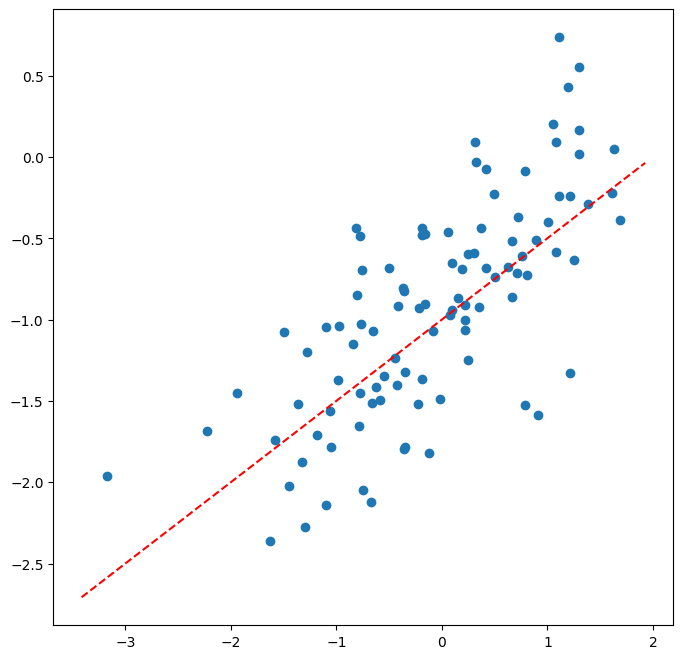

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x, y)
xlim = ax.get_xlim()
ylim = [(xlim[0]*0.5)-1, (xlim[1]*0.5)-1]
ax.plot(xlim, ylim, 'r--')


In [76]:
dataset = pd.DataFrame({'x': x, 'y': y})
model, results = lm_fit(dataset, ['x'], y)
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.8960,0.046,-19.436,0.0
x,0.5066,0.049,10.359,0.0


In [77]:
columns = [poly('x', degree=2)]
model, results1 = lm_fit(dataset, columns, y)
summarize(results1)

,coef,std err,t,P>|t|
intercept,-0.9313,0.046,-20.314,0.000
"poly(x, degree=2)[0]",4.7628,0.458,10.389,0.000
"poly(x, degree=2)[1]",0.5732,0.458,1.250,0.214


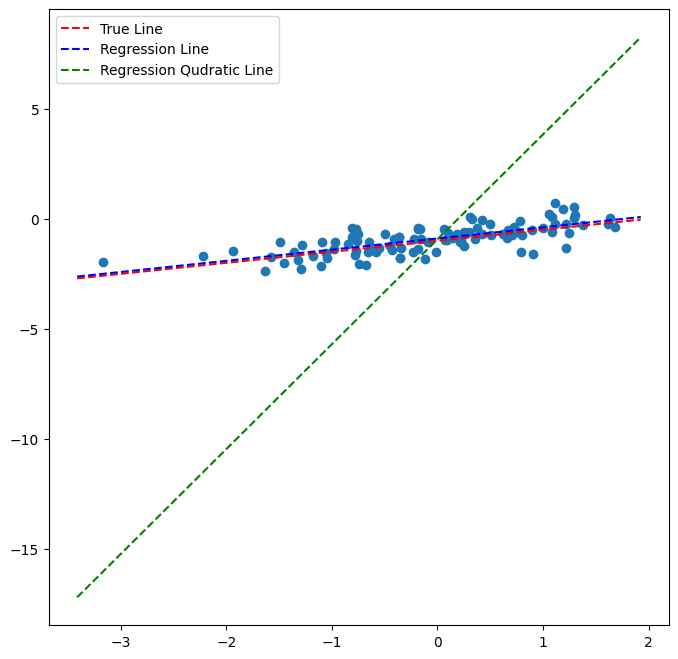

In [79]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x, y)
xlim = ax.get_xlim()
ylim = [(xlim[0]*0.5)-1, (xlim[1]*0.5)-1]
ax.plot(xlim, ylim, 'r--', label = 'True Line')
ylim_ = [xlim[0]*results.params[1] + results.params[0], xlim[1]*results.params[1] + results.params[0]]
ax.plot(xlim, ylim_, 'b--', label='Regression Line')
ylim_ = [xlim[0]*results1.params[1] + results1.params[0], xlim[1]*results1.params[1] + results1.params[0]]
ax.plot(xlim, ylim_, 'g--', label='Regression Qudratic Line')
ax.legend()